# EDA & Data preprocessing

##Loading of all librairies

In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid") #Style pour les graphiques
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data importation

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#Importation des données sur le drive
df_MobileFraud = pd.read_csv('/content/drive/My Drive/Datasets/FraudeMobileMoney.csv')

## Data exploration

In [0]:
df_MobileFraud.info() # Information génériques de la dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [0]:
print(df_MobileFraud.shape) # Dimension de la dataframe
df_MobileFraud.head(10)     # View des 10 premières entrées

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [0]:
df_MobileFraud.isnull().sum() # Recherches valeures manquantes

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [0]:
df_MobileFraud.describe() # Description standardisée des variables quantitatives

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Management of the variables types

In [0]:
df_MobileFraud['step'] = df_MobileFraud['step'].astype(str)
df_MobileFraud['type'] = df_MobileFraud['type'].astype(str)
df_MobileFraud['isFraud'] = df_MobileFraud['isFraud'].astype(str)
df_MobileFraud['isFlaggedFraud'] = df_MobileFraud['isFlaggedFraud'].astype(str)

## Creating the subdatasets with the quantitatives and qualitatives variables

In [0]:
#Variables quantitatives
df_MobileFraud_num = df_MobileFraud.select_dtypes(include = np.number)
print(df_MobileFraud_num.head(5))

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0   9839.64       170136.0       160296.36             0.0             0.0
1   1864.28        21249.0        19384.72             0.0             0.0
2    181.00          181.0            0.00             0.0             0.0
3    181.00          181.0            0.00         21182.0             0.0
4  11668.14        41554.0        29885.86             0.0             0.0


In [0]:
#Variables qualitatives
df_MobileFraud_text = df_MobileFraud.select_dtypes(include = object)
print(df_MobileFraud_text.head(5))

  step      type     nameOrig     nameDest isFraud isFlaggedFraud
0    1   PAYMENT  C1231006815  M1979787155       0              0
1    1   PAYMENT  C1666544295  M2044282225       0              0
2    1  TRANSFER  C1305486145   C553264065       1              0
3    1  CASH_OUT   C840083671    C38997010       1              0
4    1   PAYMENT  C2048537720  M1230701703       0              0


In [0]:
##Renommer les catégories des variables 'type', 'isFraud', 'isFlaggedFraud'
new_cat = {"isFraud":     {"0": "Non", "1": "Oui"},
           "isFlaggedFraud":     {"0": "Non", "1": "Oui"}}
df_MobileFraud_text.replace(new_cat, inplace=True) 
df_MobileFraud_text["isFraud"].unique()
df_MobileFraud_text["isFlaggedFraud"].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


array(['Non', 'Oui'], dtype=object)

# Univariate Analysis 

## Quantitatives Variables 

In [0]:
print(df_MobileFraud_num.head(5)) #Voir les 5 premières lignes du dataframes

     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0   9839.64       170136.0       160296.36             0.0             0.0
1   1864.28        21249.0        19384.72             0.0             0.0
2    181.00          181.0            0.00             0.0             0.0
3    181.00          181.0            0.00         21182.0             0.0
4  11668.14        41554.0        29885.86             0.0             0.0


### Histograms

In [0]:
df_MobileFraud_num.columns #Lister les noms des colonnes

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

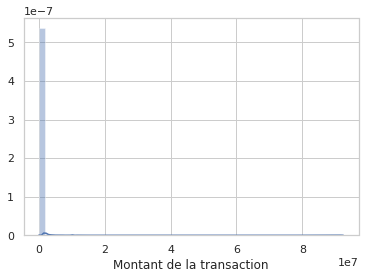

In [0]:
sns.distplot(df_MobileFraud_num.amount, axlabel = "Montant de la transaction")

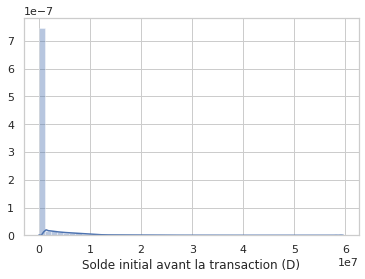

In [0]:
sns.distplot(df_MobileFraud_num.oldbalanceOrg, axlabel = "Solde initial avant la transaction (D)")

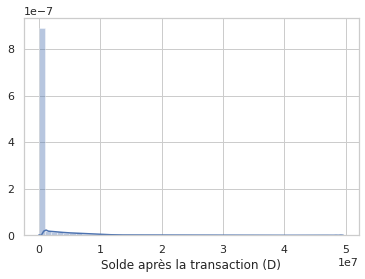

In [0]:
sns.distplot(df_MobileFraud_num.newbalanceOrig, axlabel = "Solde après la transaction (D)")

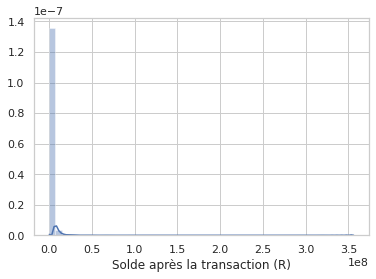

In [0]:
sns.distplot(df_MobileFraud_num.newbalanceDest, axlabel = "Solde après la transaction (R)")

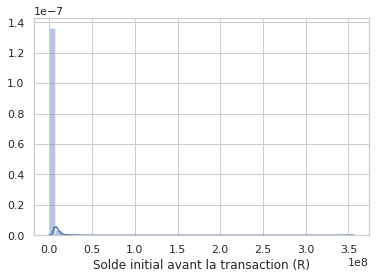

In [0]:
sns.distplot(df_MobileFraud_num.oldbalanceDest, axlabel = "Solde initial avant la transaction (R)")

Ces variables quantitatives ont une allure asymétriques et ne suivent pas une allure de courbe gaussienne. Nous allons appliquer des transformation du type log, x*2 et racine carre.

### Application of the transformation log(1+X) on the quantitatives variables quantitatives

In [0]:
df_MobileFraud_num2 = df_MobileFraud_num

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


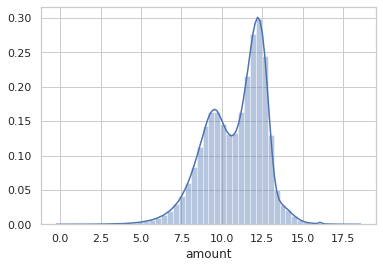

In [0]:
df_MobileFraud_num2["amount"] = df_MobileFraud_num2["amount"].apply(np.log1p) #transformation log(1+p)
sns.distplot(df_MobileFraud_num2["amount"]) #Histogrammes de variables transformée

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


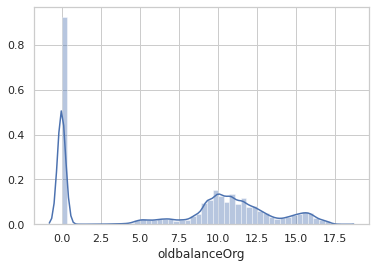

In [0]:
df_MobileFraud_num2["oldbalanceOrg"] = df_MobileFraud_num2["oldbalanceOrg"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["oldbalanceOrg"]) #Histogrammes de variables transformée

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


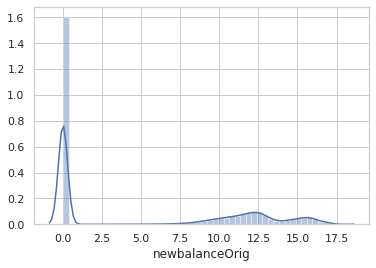

In [0]:
df_MobileFraud_num2["newbalanceOrig"] = df_MobileFraud_num2["newbalanceOrig"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["newbalanceOrig"]) #Histogrammes de variables transformée

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


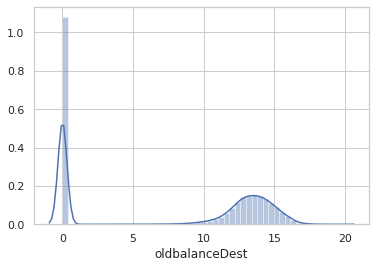

In [0]:
df_MobileFraud_num2["oldbalanceDest"] = df_MobileFraud_num2["oldbalanceDest"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["oldbalanceDest"]) #Histogrammes de variables transformée

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


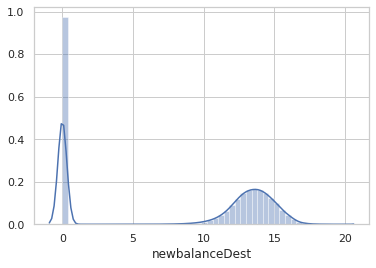

In [0]:
df_MobileFraud_num2["newbalanceDest"] = df_MobileFraud_num2["newbalanceDest"].apply(np.log1p)
sns.distplot(df_MobileFraud_num2["newbalanceDest"]) #Histogrammes de variables transformée

## Qualitatives Variables 

In [0]:
df_MobileFraud_text = df_MobileFraud_text.drop(["step", "nameOrig", "nameDest"], axis = 1)

In [0]:
df_MobileFraud_text.head()

,type,isFraud,isFlaggedFraud
0,PAYMENT,Non,Non
1,PAYMENT,Non,Non
2,TRANSFER,Oui,Non
3,CASH_OUT,Oui,Non
4,PAYMENT,Non,Non


In [0]:
type_description1 = pd.DataFrame(df_MobileFraud_text.type.value_counts())
type_description1 

,type
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [0]:
type_description2 = round(100*pd.DataFrame(df_MobileFraud_text.type.value_counts(normalize = True)), 1)
type_description2 

,type
CASH_OUT,35.2
PAYMENT,33.8
CASH_IN,22.0
TRANSFER,8.4
DEBIT,0.7


In [0]:
isFraud_description1 = pd.DataFrame(df_MobileFraud_text.isFraud.value_counts())
isFraud_description1

,isFraud
Non,6354407
Oui,8213


In [0]:
isFraud_description2 = round(100*pd.DataFrame(df_MobileFraud_text.isFraud.value_counts(normalize = True)), 1)
isFraud_description2 

,isFraud
Non,99.9
Oui,0.1


In [0]:
isFlaggedFraud_description1 = pd.DataFrame(df_MobileFraud_text.isFlaggedFraud.value_counts())
isFlaggedFraud_description1 

,isFlaggedFraud
Non,6362604
Oui,16


In [0]:
isFlaggedFraud_description2 = round(100*pd.DataFrame(df_MobileFraud_text.isFlaggedFraud.value_counts(normalize = True)), 1)
isFlaggedFraud_description2 

,isFlaggedFraud
Non,100.0
Oui,0.0


# Bivariate Analysis

## Correlation between the quantitatives variables quantitatives

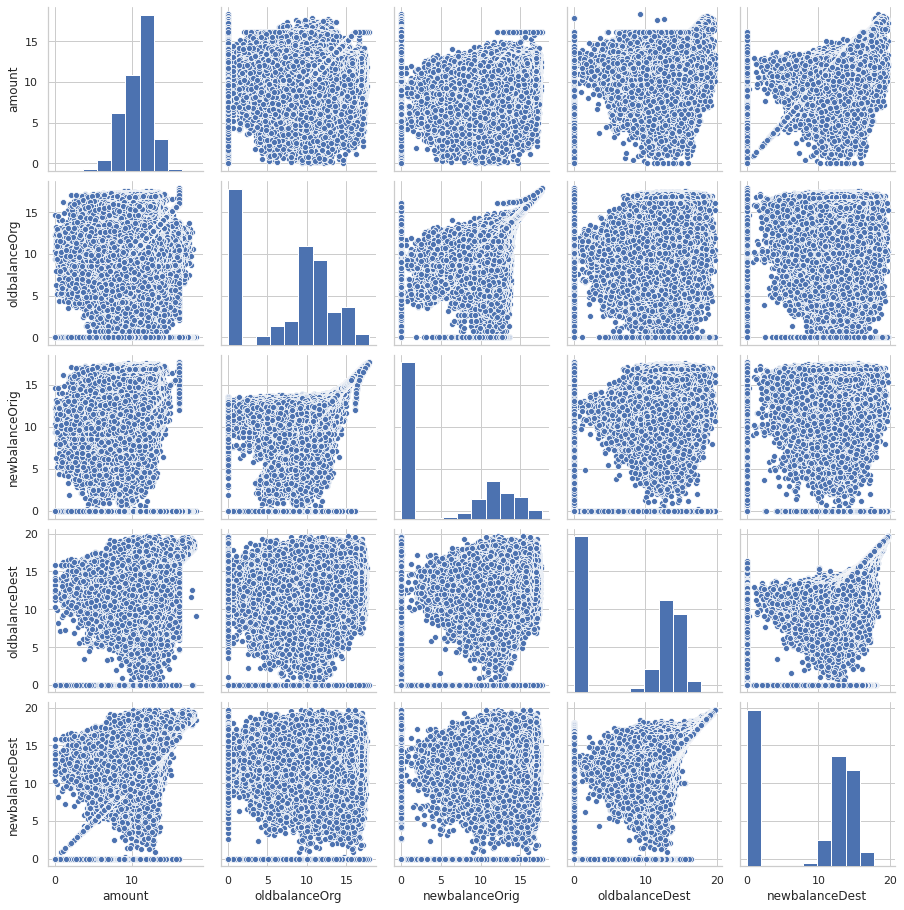

In [0]:
sns.pairplot(df_MobileFraud_num2)

## Association between the quantitatives variables with outcome (isFraud)

In [0]:
col_name3 = df_MobileFraud_num.columns
col_name3 

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [0]:
#Fusion des variables quantitatives avec outcoume
df_MobileFraud_num3 = pd.concat([df_MobileFraud_num, df_MobileFraud_text['isFraud']], axis = 1)
df_MobileFraud_num3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         object 
dtypes: float64(5), object(1)
memory usage: 291.3+ MB


[Text(0, 0.5, 'Montant de la transaction'),
 Text(0.5, 0, 'Transaction frauduleuse')]

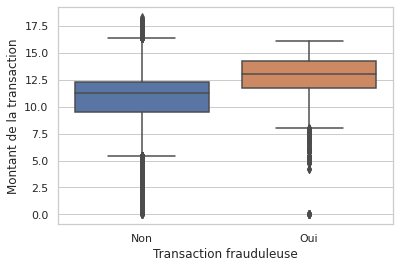

In [0]:
ax = sns.boxplot(x = "isFraud", y = "amount", data = df_MobileFraud_num3)
ax.set(xlabel="Transaction frauduleuse", ylabel = "Montant de la transaction")

In [0]:
#Test statistique de student (egalité de moyennes du montant de la transaction entre les deux groupes)
df_nonFraud = df_MobileFraud_num3[df_MobileFraud_num3["isFraud"] == "Non"]
df_Fraud = df_MobileFraud_num3[df_MobileFraud_num3["isFraud"] == "Oui"]
pvalue = stats.ttest_ind(df_nonFraud['amount'], df_Fraud['amount'], equal_var = False)
print(pvalue)

Ttest_indResult(statistic=-95.75708313179479, pvalue=0.0)


[Text(0, 0.5, 'Solde initial avant la transaction (D)'),
 Text(0.5, 0, 'Transaction frauduleuse')]

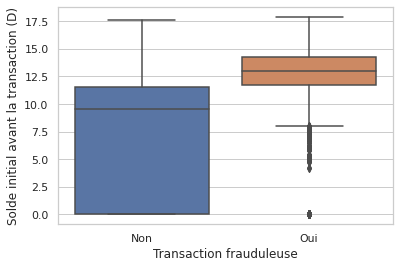

In [0]:
ax = sns.boxplot(x = "isFraud", y = "oldbalanceOrg", data = df_MobileFraud_num3)
ax.set(xlabel="Transaction frauduleuse", ylabel = "Solde initial avant la transaction (D)")

In [0]:
#Test statistique de student (egalité de moyennes du Solde initial avant la transaction(D) entre les deux groupes)
pvalue = stats.ttest_ind(df_nonFraud['oldbalanceOrg'], df_Fraud['oldbalanceOrg'], equal_var = False)
print(pvalue)

Ttest_indResult(statistic=-235.75842683280888, pvalue=0.0)


[Text(0, 0.5, 'Solde après la transaction (D)'),
 Text(0.5, 0, 'Transaction frauduleuse')]

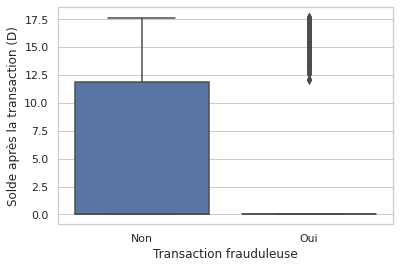

In [0]:
ax = sns.boxplot(x = "isFraud", y = "newbalanceOrig", data = df_MobileFraud_num3)
ax.set(xlabel="Transaction frauduleuse", ylabel = "Solde après la transaction (D)")

In [0]:
#Test statistique de student (egalité de moyennes du Solde initial avant la transaction(D) entre les deux groupes)
pvalue = stats.ttest_ind(df_nonFraud['newbalanceOrig'], df_Fraud['newbalanceOrig'], equal_var = False)
print(pvalue)

Ttest_indResult(statistic=212.46495581611129, pvalue=0.0)


[Text(0, 0.5, 'Solde initial avant la transaction (R)'),
 Text(0.5, 0, 'Transaction frauduleuse')]

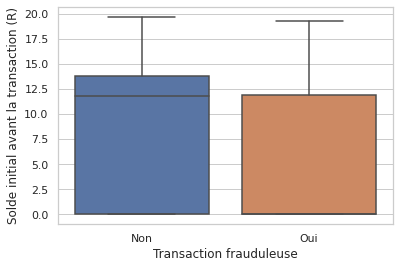

In [0]:
ax = sns.boxplot(x = "isFraud", y = "oldbalanceDest", data = df_MobileFraud_num3)
ax.set(xlabel="Transaction frauduleuse", ylabel = "Solde initial avant la transaction (R)")

In [0]:
#Test statistique de student (egalité de moyennes du Solde initial avant la transaction(R) entre les deux groupes)
pvalue = stats.ttest_ind(df_nonFraud['oldbalanceDest'], df_Fraud['oldbalanceDest'], equal_var = False)
print(pvalue)

Ttest_indResult(statistic=47.27019326092853, pvalue=0.0)


[Text(0, 0.5, 'Solde après la transaction (R)'),
 Text(0.5, 0, 'Transaction frauduleuse')]

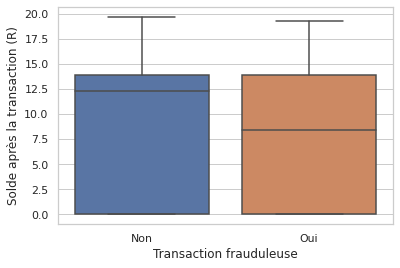

In [0]:
ax = sns.boxplot(x = "isFraud", y = "newbalanceDest", data = df_MobileFraud_num3)
ax.set(xlabel="Transaction frauduleuse", ylabel = "Solde après la transaction (R)")

In [0]:
#Test statistique de student (egalité de moyennes du Solde initial avant la transaction(R) entre les deux groupes)
pvalue = stats.ttest_ind(df_nonFraud['newbalanceDest'], df_Fraud['newbalanceDest'], equal_var = False)
print(pvalue)

Ttest_indResult(statistic=18.48723153353699, pvalue=8.432102185265487e-75)


## Association between des qualitatives variables with outcome (isFraud)

In [0]:
df_tab = pd.crosstab(df_MobileFraud_text["isFraud"], df_MobileFraud_text["type"])
df_tab

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
Non,1399284,2233384,41432,2151495,528812
Oui,0,4116,0,0,4097


# Multivariate analysis

## Data processing

In [0]:
df_MobileFraud_modelling = pd.concat([df_MobileFraud_num3, df_MobileFraud_text['type']], axis = 1)

In [0]:
#Recode the variable 'isFraud' for ML 
df_MobileFraud_modelling.loc[df_MobileFraud_modelling["isFraud"] == "Non", "isFraud"] = 0
df_MobileFraud_modelling.loc[df_MobileFraud_modelling["isFraud"] == "Oui", "isFraud"] = 1

In [0]:
#Create the subset data (Covariables and outcome)
x_all = df_MobileFraud_modelling.drop(["isFraud"],  axis = 1) 
y = df_MobileFraud_modelling[["isFraud"]]                 

In [0]:
df_MobileFraud_modelling.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type'],
      dtype='object')

In [0]:
x_sub = df_MobileFraud_modelling.drop(["isFraud", "oldbalanceDest"],
                                      axis = 1) 

We are going to remove all covariables with P.value > 0.05, then we keep these covariables (oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest' and 'type')

In [0]:
#Create the dummies variables
x_all_dum = pd.get_dummies(x_all, drop_first = True)
x_sub_dum = pd.get_dummies(x_sub, drop_first = True)
y_dum = pd.get_dummies(y, drop_first = True, )

In [0]:
# Feature scaling 
sc_x = StandardScaler()
x_all_scal = sc_x.fit_transform(x_all_dum)
x_sub_scal = sc_x.fit_transform(x_sub_dum)

## Splitting dataset for ML

In [0]:
# Train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all_scal, y_dum, 
                                                    test_size=0.20, random_state=1006)
x_sub_train, x_sub_test, y_sub_train, y_sub_test = train_test_split(x_sub_scal, 
                                                                    y_dum, test_size=0.20, random_state=1007)  

In [0]:
#Logistic regression to select the significants covariables
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 2.146282
         Iterations 3


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                           Results: Logit
Model:              Logit            Pseudo R-squared: inf          
Dependent Variable: isFraud_1        AIC:              21849579.7523
Date:               2020-06-05 12:18 BIC:              21849700.7376
No. Observations:   5090096          Log-Likelihood:   -1.0925e+07  
Df Model:           8                LL-Null:          0.0000       
Df Residuals:       5090087          LLR p-value:      1.0000       
Converged:          1.0000           Scale:            1.0000       
No. Iterations:     3.0000                                          
-----------------------------------------------------------------------
         Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
-----------------------------------------------------------------------
x1       0.0018      0.0015      1.2233    0.2212    -0.0011     0.0046
x2       0.0196      0.0015     13.2312    0.0000     0.0167     0.0225
x3      -0.0169      0.0020     -8.6475    0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


We are going to remove all covariables with P.value > 0.05, then we keep these covariables (oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest' and 'type')


## Modelling ML

### Logistic regression and decision trees (Model with all covariables)

In [0]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Evaluation of model 
print("Train score : {}".format(classifier.score(x_train, y_train)))
print("Test score : {}".format(classifier.score(x_test, y_test)))


Train score : 0.9993031565612908
Test score : 0.9992951017033863


In [0]:
# Fit the classifiers using the training dataset
classifiers = {"LR": {"f": LogisticRegression()},
               "DT": {"f": DecisionTreeClassifier()}}

for model in classifiers.keys():
    # Fit
    classifiers[model]["f"].fit(x_train, y_train)
    # Predict
    classifiers[model]["c"] = classifiers[model]["f"].predict(x_test)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(x_test)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(x_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Evaluate the performance
measures = {"F1": f1_score, "Precision": precision_score, 
            "Recall": recall_score, "Accuracy": accuracy_score}
results = pd.DataFrame(columns=measures.keys())

# Evaluate each model in classifiers
for model in classifiers.keys():
    results.loc[model] = [measures[measure](y_test, classifiers[model]["c"]) 
      for measure in measures.keys()]

print(results)

          F1  Precision    Recall  Accuracy
LR  0.663919   0.892246  0.528640  0.999295
DT  0.900879   0.915588  0.886635  0.999743


### Logistic regression and decision trees (Model with all covariables selected)

The variables or features selected are 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest' and 'type'

In [0]:
classifier = LogisticRegression()
classifier.fit(x_sub_train, y_sub_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Evaluation of model 
print("Train score : {}".format(classifier.score(x_sub_train, y_sub_train)))
print("Test score : {}".format(classifier.score(x_sub_test, y_sub_test)))


Train score : 0.9992929406439486
Test score : 0.9992707406697241


In [0]:
# Fit the classifiers using the training dataset
classifiers = {"LR": {"f": LogisticRegression()},
               "DT": {"f": DecisionTreeClassifier()}}

for model in classifiers.keys():
    # Fit
    classifiers[model]["f"].fit(x_sub_train, y_sub_train)
    # Predict
    classifiers[model]["c"] = classifiers[model]["f"].predict(x_sub_test)
    classifiers[model]["p"] = classifiers[model]["f"].predict_proba(x_sub_test)
    classifiers[model]["p_train"] = classifiers[model]["f"].predict_proba(x_sub_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Evaluate the performance
measures = {"F1": f1_score, "Precision": precision_score, 
            "Recall": recall_score, "Accuracy": accuracy_score}
results = pd.DataFrame(columns=measures.keys())

# Evaluate each model in classifiers
for model in classifiers.keys():
    results.loc[model] = [measures[measure](y_sub_test, classifiers[model]["c"]) for measure in measures.keys()]

print(results)

          F1  Precision    Recall  Accuracy
LR  0.646072   0.877720  0.511165  0.999271
DT  0.895631   0.900549  0.890766  0.999730
